In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [80]:
# loading the csv data to a Pandas DataFrame
house_data = pd.read_csv('data/Housing.csv')

In [81]:
# print firs 5 rows of the dataset
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
# print last 5 rows of the dataset
house_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [83]:
# number of rows and columns in the dataset
house_data.shape

(545, 13)

In [84]:
# getting some info about the data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [85]:
# checking for missing values
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [86]:
# statistical measures about the data
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [87]:
# checking the distribution of price Variable
house_data['price'].value_counts()

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64

In [88]:
# translate string values to numeric representations
house_data['mainroad'] = house_data['mainroad'].map({'yes': 1, 'no': 0})
house_data['guestroom'] = house_data['guestroom'].map({'yes': 1, 'no': 0})
house_data['basement'] = house_data['basement'].map({'yes': 1, 'no': 0})
house_data['hotwaterheating'] = house_data['hotwaterheating'].map({'yes': 1, 'no': 0})
house_data['airconditioning'] = house_data['airconditioning'].map({'yes': 1, 'no': 0})
house_data['prefarea'] = house_data['prefarea'].map({'yes': 1, 'no': 0})
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'furnished': 1, 'unfurnished': 0,'semi-furnished': 0.5})


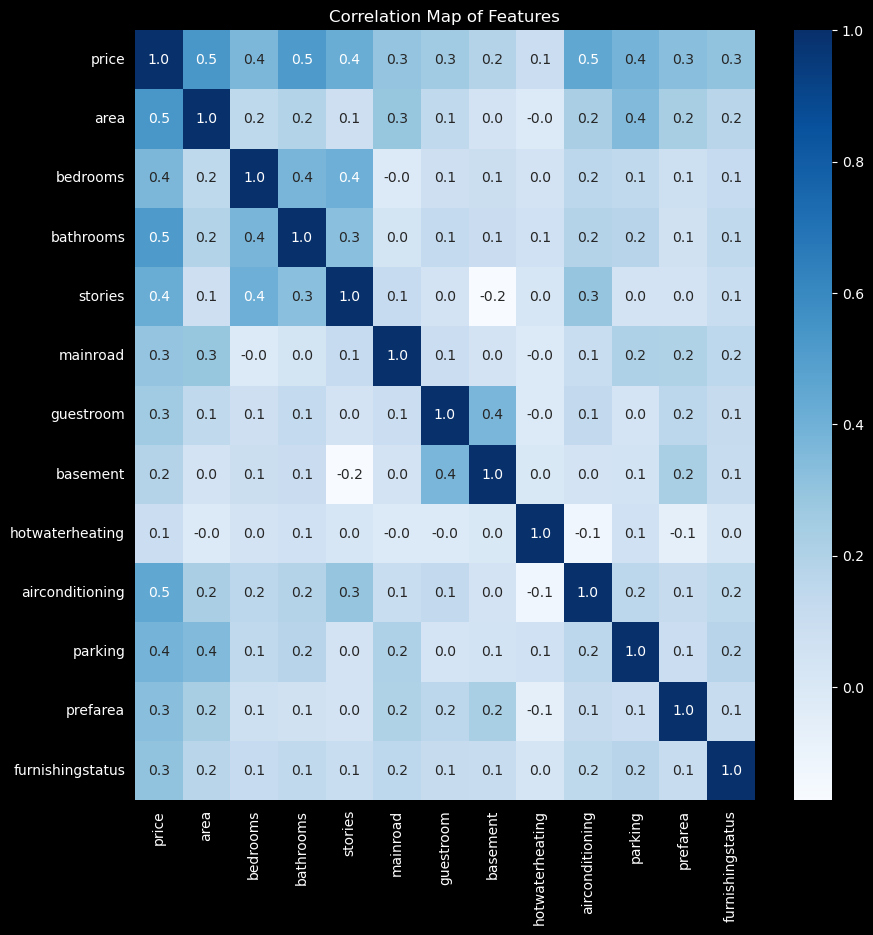

In [89]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(),annot=True,fmt='.1f',cmap='Blues')
plt.title('Correlation Map of Features')
plt.show()

Splitting the Features and Price


In [90]:
X = house_data.drop('price',axis=1)
Y = house_data['price']

In [91]:
print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [92]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


Splitting the Data into Training Data & Test Data


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(545, 12) (436, 12) (109, 12)


Model Training


Linear Regression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Evaluation


R2 Score

In [97]:
test_predictions = model.predict(X_test)
r2 = r2_score(Y_test, test_predictions)
print(r2)

0.6361990100766217


Mean Absolute Error

In [98]:
mae = mean_absolute_error(Y_test, test_predictions)
print(mae)

865891.4864066525
